# < Seyed Ahmad Hosseini >
- hosseiniahmad07@gmail.com


# MNIST Digit Classification with Dense and CNN Models

In this project, we compare two neural network models for classifying handwritten digits from the MNIST dataset using TensorFlow and Keras. The MNIST dataset consists of 60,000 training images and 10,000 test images of digits (0–9).

## Steps of the Code

### 1. Data Loading and Preprocessing
- The MNIST dataset is loaded and normalized by dividing each pixel by 255 to scale the values between 0 and 1.
- The data is reshaped to be compatible with each model:
  - **Model 1 (Fully Connected Network)**: The data is flattened into a 784-element vector (28x28 image).
  - **Model 2 (Convolutional Neural Network with Dropout)**: The data is reshaped to a 28x28 grid with one channel.

### 2. Model 1 - Fully Connected Network
- This model consists of two dense (fully connected) hidden layers, each with 512 neurons and ReLU activation.
- The output layer has 10 neurons with softmax activation for classification into 10 categories (digits 0–9).

### 3. Model 2 - Convolutional Neural Network with Dropout
- This model starts with a 2D convolutional layer with 32 filters and a 3x3 kernel, followed by max-pooling.
- The next layers include two dense layers with ReLU activation and Dropout layers (with a 20% dropout rate) to reduce overfitting.
- The output layer is similar to Model 1, using softmax for classification.

### 4. Training and Evaluation
- Each model is compiled with the Adam optimizer and `sparse_categorical_crossentropy` loss function.
- Models are trained for five epochs with training and validation accuracy/loss recorded.
- After training, the test accuracy is evaluated for both models.

### 5. Visualization of Results
- The training and validation accuracy and loss of both models are plotted for comparison.
- Model 2, which includes Dropout, is expected to perform better in generalization by reducing overfitting.


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9026 - loss: 0.3139 - val_accuracy: 0.9708 - val_loss: 0.0934
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9742 - loss: 0.0797 - val_accuracy: 0.9732 - val_loss: 0.0923
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9833 - loss: 0.0505 - val_accuracy: 0.9790 - val_loss: 0.0671
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9880 - loss: 0.0357 - val_accuracy: 0.9783 - val_loss: 0.0775
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9906 - loss: 0.0304 - val_accuracy: 0.9766 - val_loss: 0.0897
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9102 - loss: 0.2890 - val_accuracy: 0.9813 - val_loss: 0.0547
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9836 - loss: 0.0509 - val_accuracy: 0.9849 - val_loss: 0.0510
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9898 - loss: 0.0309 - val_

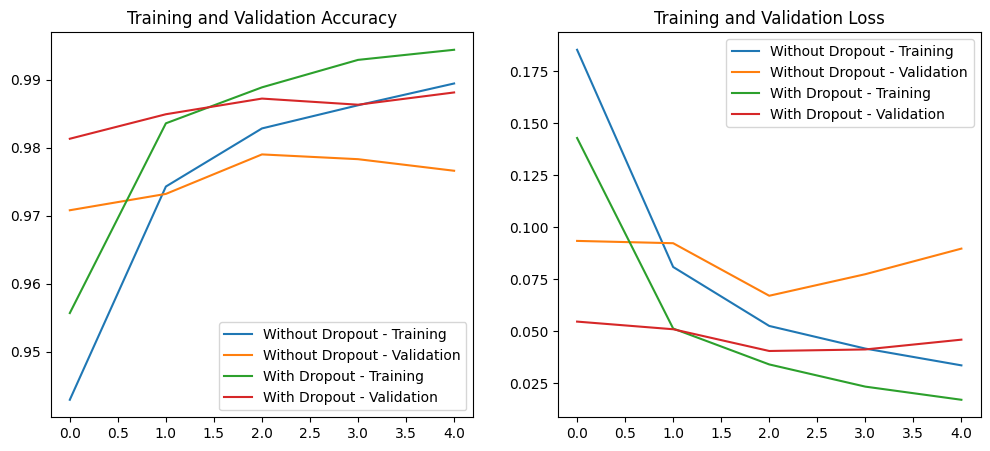

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Reshape



(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

model1 = Sequential()
model1.add(Dense(512, activation='relu', input_shape=(784,)))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(10, activation='softmax'))


model2 = Sequential()
model2.add(Reshape((28, 28, 1), input_shape=(784,)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
history2 = model2.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)
test_loss, test_acc = model2.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)



import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Without Dropout - Training')
plt.plot(history1.history['val_accuracy'], label='Without Dropout - Validation')
plt.plot(history2.history['accuracy'], label='With Dropout - Training')
plt.plot(history2.history['val_accuracy'], label='With Dropout - Validation')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Without Dropout - Training')
plt.plot(history1.history['val_loss'], label='Without Dropout - Validation')
plt.plot(history2.history['loss'], label='With Dropout - Training')
plt.plot(history2.history['val_loss'], label='With Dropout - Validation')
plt.title('Training and Validation Loss')
plt.legend()




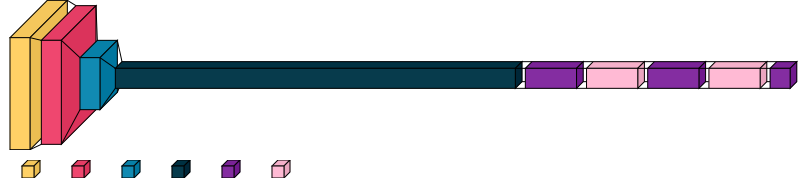

In [ ]:
import visualkeras

visualkeras.layered_view(model2,legend=True ,to_file='out.png')

# Confusion Matrix Analysis for MNIST Digit Classification

In this section of the project, we evaluate the performance of two neural network models for classifying handwritten digits from the MNIST dataset. This analysis utilizes confusion matrices to provide insights into the predictions made by each model and to identify areas where they perform well or poorly.

## Overview

We have two models:
- **Model 1**: Fully Connected Network (without dropout)
- **Model 2**: Convolutional Neural Network (with dropout)

The confusion matrices will compare the true labels of the test dataset against the predicted labels generated by each model.

## Model Predictions

For each model, predictions are made on the test dataset. The predicted class labels are determined by selecting the index with the highest probability for each sample. The confusion matrices for both models are calculated using the true labels and the predicted class labels.

## Visualization of Confusion Matrices

The confusion matrices for both models are visualized side by side. This allows for easy comparison of the performance of each model. Each matrix shows the number of correct and incorrect predictions for each digit class. The diagonal elements represent the correct predictions, while the off-diagonal elements indicate misclassifications.

## Results Interpretation

The confusion matrices reveal how well each model classifies the digits. By analyzing these matrices, we can identify which digits are commonly confused and assess the overall performance of each model. 

For example, if a significant number of images of the digit "5" are misclassified as "3," this could indicate that the model struggles to differentiate between these two digits. Such insights can help inform further improvements to the model architecture or training process.

## Conclusion

The confusion matrix analysis provides a deeper understanding of the strengths and weaknesses of each model in classifying handwritten digits from the MNIST dataset. This analysis complements the overall evaluation of the models and highlights the effectiveness of dropout in improving generalization.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


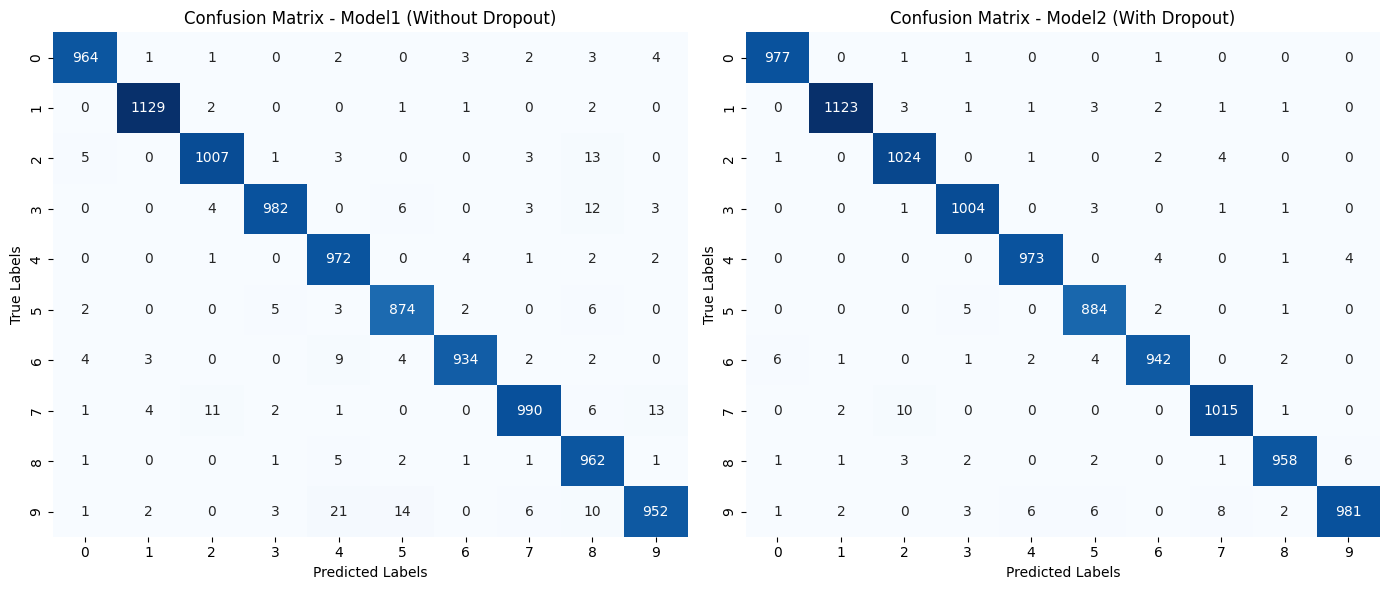

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred1 = model1.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)

conf_matrix1 = confusion_matrix(y_test, y_pred_classes1)

y_pred2 = model2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)

conf_matrix2 = confusion_matrix(y_test, y_pred_classes2)

plt.figure(figsize=(14, 6))

# Confusion matrix for model1
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Model1 (Without Dropout)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Confusion matrix for model2
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Model2 (With Dropout)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()
